# MNIST digits

In [ ]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
# Download the dataset
(xtrain, ytrain), (xtest, ytest) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Scale the pixels
xtrain = xtrain / 255
xtest = xtest / 255

# Autoencoder

In [ ]:
# Design the network
autoencoder = keras.models.Sequential([
    keras.Input(shape=(28, 28)),

    # Encoder half
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(16, activation="relu"),

    # Decoder half
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(784, activation="sigmoid"),
    keras.layers.Reshape((28, 28))
])

In [ ]:
# Train the network
autoencoder.compile(loss="mse", optimizer="adam")
history = autoencoder.fit(xtrain, xtrain, epochs=10, batch_size=32, verbose=False)

In [ ]:
# Reconstruct the test images
predictions = autoencoder.predict(xtest)

313/313 [==============================] - 1s 2ms/step


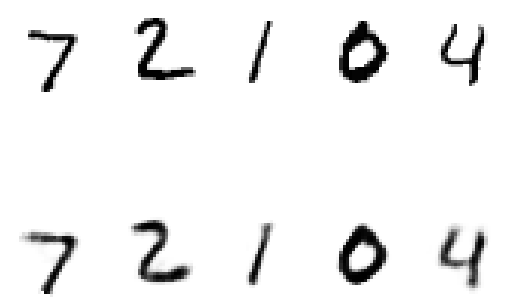

In [ ]:
# Plot some test images
for i in range(5):
  plt.subplot(2, 5, i+1)
  plt.imshow(xtest[i], cmap="binary")
  plt.axis("off")

# And their reconstructions
for i in range(5):
  plt.subplot(2, 5, 5+i+1)
  plt.imshow(predictions[i], cmap="binary")
  plt.axis("off")

# Denoiser

In [ ]:
# Create noisy versions of the images
noisy_xtrain = xtrain + np.random.normal(scale=0.4, size=xtrain.shape)
noisy_xtest = xtest + np.random.normal(scale=0.4, size=xtest.shape)

In [ ]:
# Design the network
denoiser = keras.models.Sequential([
    keras.Input(shape=(28, 28, 1)),

    # Encoder half
    keras.layers.Conv2D(8, kernel_size=3, padding="same", strides=2, activation="relu"),
    keras.layers.Conv2D(8, kernel_size=3, padding="same", strides=2, activation="relu"),
    keras.layers.Conv2D(8, kernel_size=3, padding="valid", strides=2, activation="relu"),

    # Decoder half
    keras.layers.Conv2DTranspose(8, kernel_size=3, padding="valid", strides=2, activation="relu"),
    keras.layers.Conv2DTranspose(8, kernel_size=3, padding="same", strides=2, activation="relu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, padding="same", strides=2, activation="sigmoid")
])

In [ ]:
# Train the network
denoiser.compile(loss="mse", optimizer="adam")
history = denoiser.fit(noisy_xtrain, xtrain, epochs=10, batch_size=32, verbose=False)

In [ ]:
# Denoise the test images
predictions = denoiser.predict(noisy_xtest)

313/313 [==============================] - 1s 2ms/step


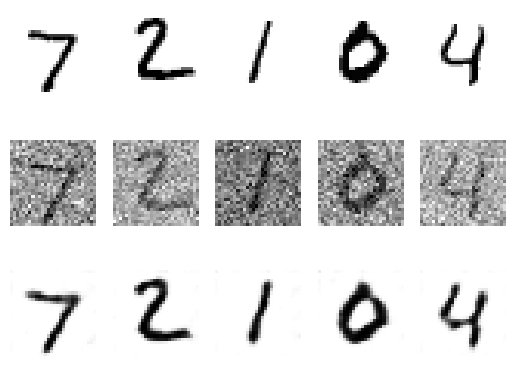

In [ ]:
# Plot some test images
for i in range(5):
  plt.subplot(3, 5, i+1)
  plt.imshow(xtest[i], cmap="binary")
  plt.axis("off")

# And their noisy versions
for i in range(5):
  plt.subplot(3, 5, 5+i+1)
  plt.imshow(noisy_xtest[i], cmap="binary")
  plt.axis("off")

# And their denoised versions
for i in range(5):
  plt.subplot(3, 5, 10+i+1)
  plt.imshow(predictions[i], cmap="binary")
  plt.axis("off")

# ProGAN faces

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [ ]:
# Load a pretrained progressive GAN
url = "https://tfhub.dev/google/progan-128/1"
gan = hub.load(url).signatures["default"]

In [ ]:
# Generate some random faces
vectors = tf.random.normal((3, 512))
images = gan(vectors)["default"]

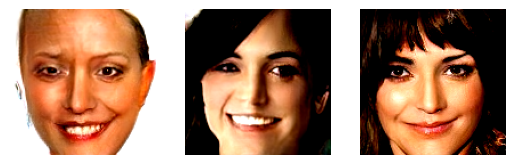

In [ ]:
# Display them
for i in range(3):
  plt.subplot(1, 3, i+1)
  plt.imshow(images[i])
  plt.axis("off")